### Why Matplotlib?

- Built on NumPy arrays (and Python)
- Integrates directly with Pandas
- Can create basic or advanced plots
- Simple to use interface (once you get the foundations)

### What are we going to cover?

- A Matplotlib workflow

1. Create data
2. Create plot (figure)
3. Plot data (axes on the figure)
4. Customize plot
5. Save/share plot

- Importing Matplotlib and the 2 ways of plotting
- Plotting data from NumPy arrays
- Plotting data from pandas DataFrames (Matplotlib Pandas API)
- Customizing plots
- Saving and sharing plots

# Introduction to Matplotlib 

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

[]

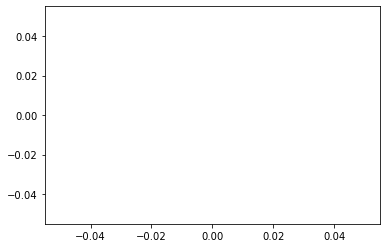

In [2]:
plt.plot()

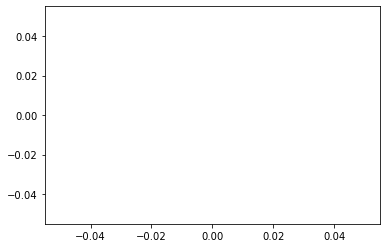

In [3]:
plt.plot(); # semicolon to get rid of the weird empty list as returned in the previous output

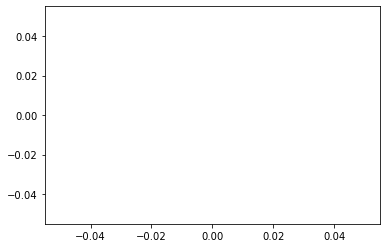

In [4]:
plt.plot()
plt.show() # Achieves the same purpose as plt.plot();

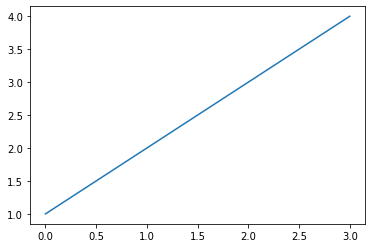

In [5]:
plt.plot([1,2,3,4]); # plot y using x as index array 0..N-1

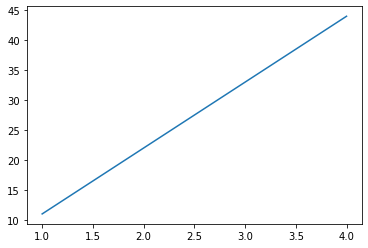

In [6]:
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y);

### The 2 ways of plotting using matplotlb are -
1. pyplot API
2. Object-Oriented API

The Object Oriented API is generally more flexible than the pyplot API and is the more recommended way for plotting for general purposes. Hence, we will stick to the OO way.

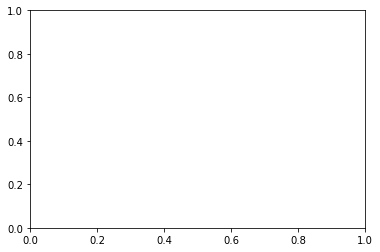

In [7]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

# The above is a longer way of doing plt.plot();

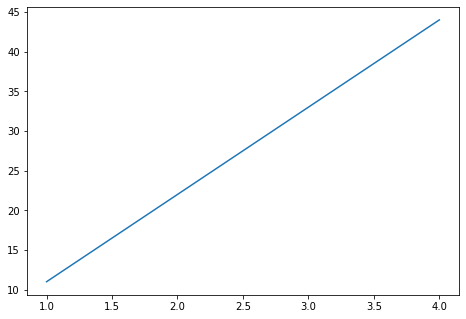

In [8]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y) # add some data
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

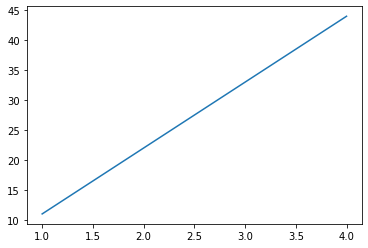

In [9]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, y); # add some data, semicolon to save a line of code
type(fig), type(ax) # Fig refers to the figure object and ax refers to the AxesSubplot object, hence this is Object Oriented in nature

<img src='matplotlib-anatomy-of-a-plot.png'>

![]('matplotlib-anatomy-of-a-plot.png')

### The figure is the base canvas and the axes are like we are drawing on that base canvas

### Matplotlib example workflow 

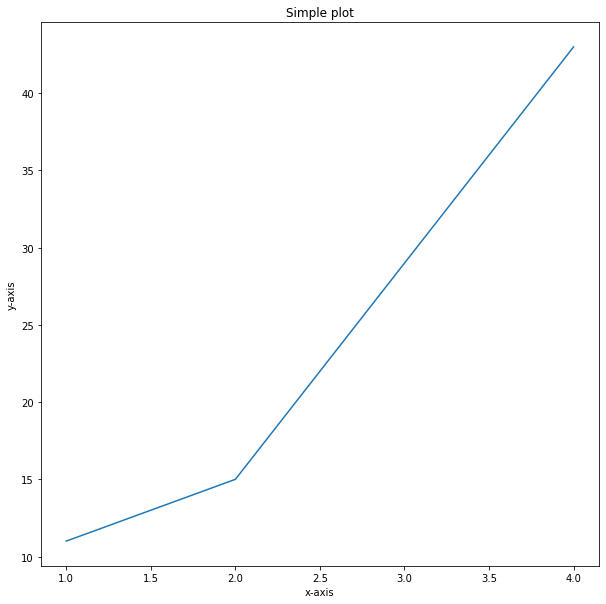

In [10]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1,2,3,4]
y = [11,15,29,43]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10)) #figsize is used to set up the dimensions(width, height) of the canvas(maptlotlib.figure.Figure)


# 3. Plot data
ax.plot(x, y);

# 4. Customize plot
ax.set(title='Simple plot',
      xlabel='x-axis',
      ylabel='y-axis')

# 5. Save & show (you save the whole figure)
fig.savefig('sample-plot.png')

### Self directed experiment 

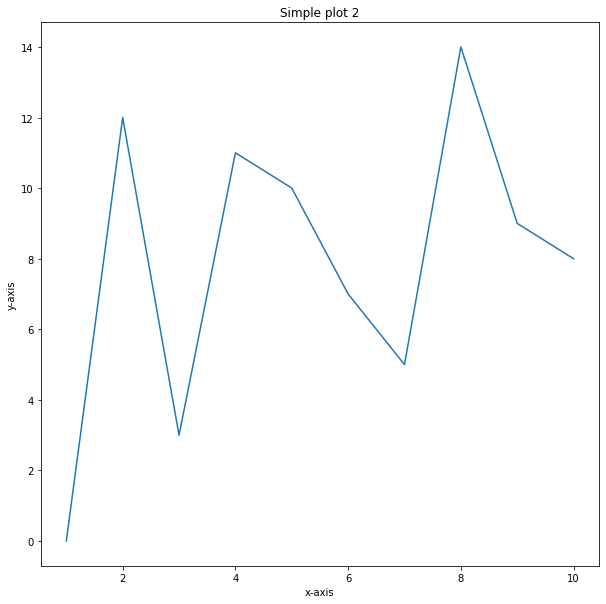

In [11]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = list(range(1,11))
y = np.random.randint(15,size=(10,))

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10)) #figsize is used to set up the dimensions(width, height) of the canvas(maptlotlib.figure.Figure)


# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title='Simple plot 2',
      xlabel='x-axis',
      ylabel='y-axis');

# 5. Save & show (you save the whole figure)
fig.savefig('sample-plot-2.png')

### Making figures with NumPy arrays 

We want:
- Line plot
- Scatter plot
- Bar plot
- Histogram
- Subplots

In [12]:
import numpy as np

In [13]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

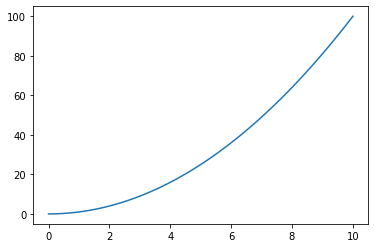

In [14]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, np.square(x))

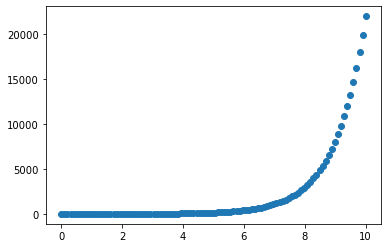

In [15]:
# Use the same data to make a scatter plot
fig, ax = plt.subplots() # Remember that fig and ax must be reset in every new cell
ax.scatter(x, np.exp(x));

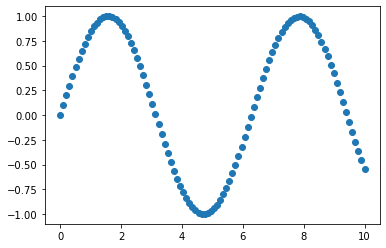

In [16]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

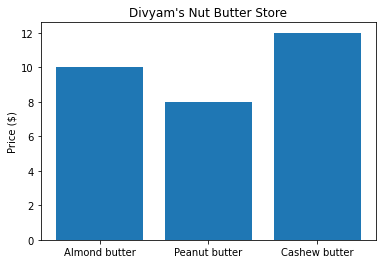

In [17]:
# Make a bar plot from a dictionary
nut_butter_prices = {'Almond butter': 10,
                    'Peanut butter': 8,
                    'Cashew butter': 12}

fig, ax = plt.subplots()
x,y = nut_butter_prices.keys(), nut_butter_prices.values()
ax.bar(x,y)
ax.set(title="Divyam's Nut Butter Store",
      ylabel="Price ($)"); # Always add a semicolon to the last line where you call ax to remove the line of text in output

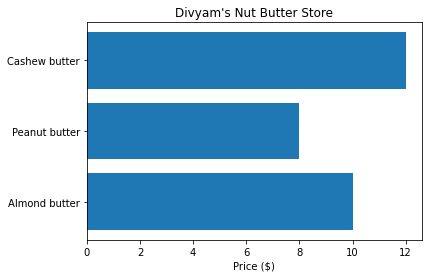

In [18]:
# Horizontal bar graph from dictionary
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values())) # Horizontal bar plot quirk
ax.set(title="Divyam's Nut Butter Store",
      xlabel="Price ($)");

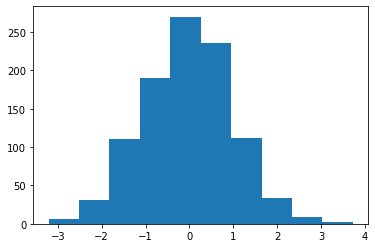

In [19]:
# Making a histogram with normally distributed values
x = np.random.randn(1000) #randn returns values from a standard normal dsitribution
fig, ax = plt.subplots()
ax.hist(x);

### Two options for subplots 

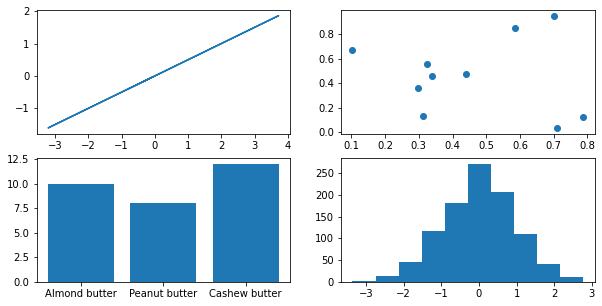

In [20]:
# Subplots option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(10,5))

# Plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

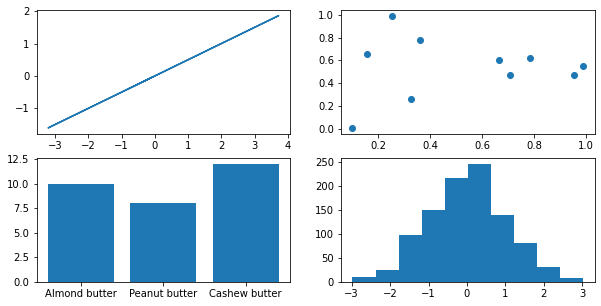

In [21]:
# Subplots option 2
fig, ax = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(10,5))
# Plot to each different index
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

### Plotting from pandas DataFrames 

In [22]:
import pandas as pd

In [48]:
# Make a dataframe
car_sales = pd.read_csv('car-sales.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [31]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2020', periods=1000))

In [32]:
ts

2020-01-01   -0.695910
2020-01-02    1.013294
2020-01-03    0.330177
2020-01-04    0.091111
2020-01-05   -1.399640
                ...   
2022-09-22    0.716476
2022-09-23    0.494736
2022-09-24    1.035687
2022-09-25    0.446277
2022-09-26   -1.016564
Freq: D, Length: 1000, dtype: float64

In [33]:
ts.cumsum() # cummulative sum

2020-01-01    -0.695910
2020-01-02     0.317384
2020-01-03     0.647561
2020-01-04     0.738672
2020-01-05    -0.660968
                ...    
2022-09-22   -30.594669
2022-09-23   -30.099933
2022-09-24   -29.064246
2022-09-25   -28.617969
2022-09-26   -29.634533
Freq: D, Length: 1000, dtype: float64

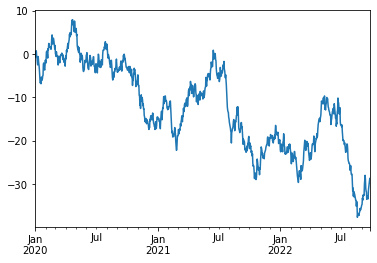

In [34]:
ts = ts.cumsum()
ts.plot();

In [49]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [50]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [51]:
car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]','')

In [52]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [53]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [54]:
car_sales['Price'] = car_sales['Price'].str[:-2] # Very cool, remember this

In [57]:
car_sales['Sale Date'] = pd.date_range('1/1/2020', periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [58]:
car_sales['Total Sales'] = car_sales['Price'].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


In [59]:
car_sales.dtypes

Make                     object
Colour                   object
Odometer (KM)             int64
Doors                     int64
Price                    object
Sale Date        datetime64[ns]
Total Sales               int32
dtype: object

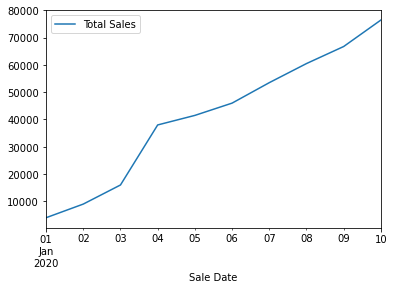

In [61]:
car_sales.plot(x='Sale Date', y='Total Sales');

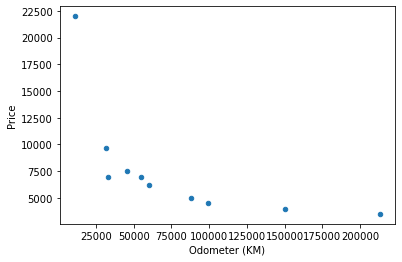

In [65]:
car_sales['Price'] = car_sales['Price'].astype(int)
car_sales.plot(x='Odometer (KM)', y='Price', kind='scatter'); # decreasing trend in below scatterplot makes sense because as a car runs more kms, it's price reduces

In [69]:
# How about a bar graph?
x = np.random.rand(10, 4)

# Turn it into a dataframe
df = pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,0.335688,0.052042,0.122942,0.293398
1,0.309315,0.766624,0.261398,0.329659
2,0.600963,0.407820,0.369735,0.561080
3,0.960535,0.106628,0.593318,0.398664
4,0.669094,0.009244,0.724920,0.102464
5,0.801250,0.796913,0.022110,0.642464
6,0.641765,0.262297,0.875509,0.990795
7,0.679254,0.002431,0.688642,0.846715
8,0.396424,0.346863,0.092883,0.402617
9,0.086787,0.244018,0.875989,0.640516


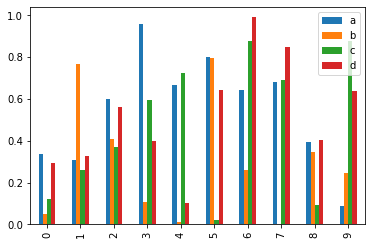

In [71]:
df.plot.bar();

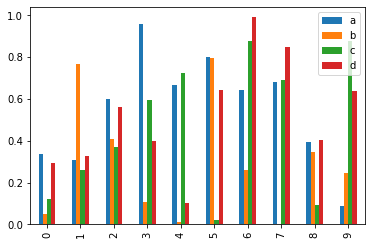

In [74]:
df.plot(kind='bar'); # Same thing as above

In [75]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


In [78]:
car_sales.dtypes

Make                     object
Colour                   object
Odometer (KM)             int64
Doors                     int64
Price                     int32
Sale Date        datetime64[ns]
Total Sales               int32
dtype: object

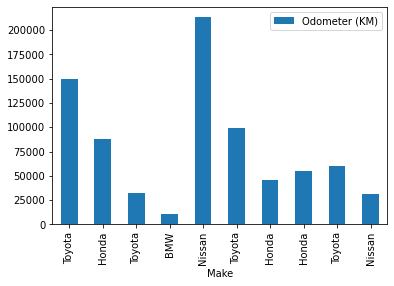

In [79]:
car_sales.plot(x='Make', y='Odometer (KM)', kind='bar');

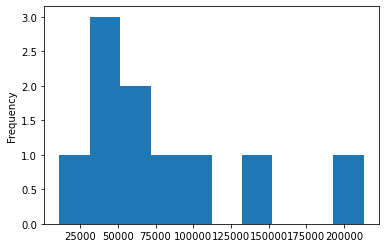

In [83]:
# How about histograms? (These are great for visualizing spreads of data)
car_sales['Odometer (KM)'].plot(kind='hist');

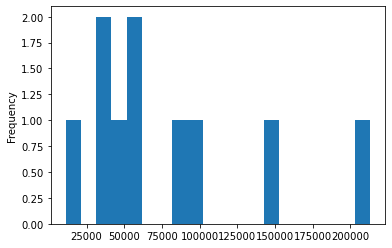

In [85]:
car_sales['Odometer (KM)'].plot.hist(bins=20); # this way of doing it gives us more power over specifics of the plot type (like bins in case of histograms)